In [ ]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model

path = "./data/"
filename_read = os.path.join(path,"Churn_Modelling.csv")

df = pd.read_csv(filename_read, na_values=['NA','?'], encoding="ISO-8859-1");
df.drop(['CustomerId','RowNumber','Surname'],inplace=True,axis=1)

In [ ]:
print(df['Geography'].value_counts().sort_values(ascending=False));
print(df['Gender'].value_counts().sort_values(ascending=False));

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [ ]:
countryMapping ={'France':1,'Germany':2,'Spain':3}
genderMapping={'Male':0,'Female':1}
exitMapping = {0:'No',1:'Yes'}
df['Geography'] = df['Geography'].map(countryMapping)
df['Gender'] = df['Gender'].map(genderMapping)
df['Exited'] = df['Exited'].map(exitMapping);

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,Yes
1,608,3,1,41,1,83807.86,1,0,1,112542.58,No
2,502,1,1,42,8,159660.80,3,1,0,113931.57,Yes
3,699,1,1,39,1,0.00,2,0,0,93826.63,No
4,850,3,1,43,2,125510.82,1,1,1,79084.10,No


# Correlation Checking
Since the attributes had low correlations, we were unable to eliminate any of them for intraconnection.

In [ ]:
#dfCorrelCheck = df.filter(['CreditScore','Balance','EstimatedSalary','Age']);
dfCorrelCheck = df;
dfCorrelCheck.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,Yes
1,608,3,1,41,1,83807.86,1,0,1,112542.58,No
2,502,1,1,42,8,159660.80,3,1,0,113931.57,Yes
3,699,1,1,39,1,0.00,2,0,0,93826.63,No
4,850,3,1,43,2,125510.82,1,1,1,79084.10,No


In [ ]:
dfCorrelCheck.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,0.007888,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Geography,0.007888,1.000000,-0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369
Gender,0.002857,-0.004719,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112
Age,-0.003965,0.022812,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,0.003739,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.069408,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,0.003972,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.008523,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.006724,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.001369,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


# PCA
In the table below, it shows that each PCA accounts for about the same number of variation (not really good & thus PCA is not really good for this dataset). Nonetheless, it shows that we need at least 8 principal componenents to have a cumulative proportion of above 80.

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pcs = PCA()
pcs.fit(preprocessing.scale(df.iloc[:, 0:10].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                     'Proportion of variance': pcs.explained_variance_ratio_,
                     'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Standard deviation,1.1492,1.0503,1.0133,1.0075,1.0031,0.9974,0.9951,0.9846,0.9430,0.8278
Proportion of variance,0.1321,0.1103,0.1027,0.1015,0.1006,0.0995,0.0990,0.0969,0.0889,0.0685
Cumulative proportion,0.1321,0.2424,0.3450,0.4465,0.5471,0.6466,0.7456,0.8426,0.9315,1.0000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Y2 = pd.DataFrame(df, columns=['Exited'])
X2 = df.filter(['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])
X2 = StandardScaler().fit_transform(X2)
print(X2)

[[-0.32622142 -0.90188624  1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44003595  1.51506738  1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53679418 -0.90188624  1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60498839 -0.90188624  1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25683526  0.30659057 -0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.46377078 -0.90188624  1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(X2);
componentsDF = pd.DataFrame(data = components, columns = ['PC1','PC2'])
finalDf = pd.concat([componentsDF, df[['Exited']]], axis=1)
finalDf.head()

,PC1,PC2,Exited
0,0.357844,0.878636,Yes
1,-1.068628,1.562152,No
2,1.044228,-1.072255,Yes
3,1.457575,0.279611,No
4,-1.408791,1.573353,No


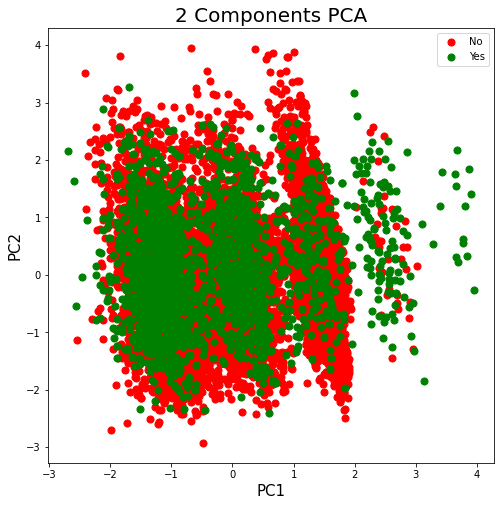

In [ ]:
fig = plt.figure(figsize = (8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 Components PCA', fontsize=20)
targets = ['No','Yes']
colors = ['red','green']

for target, color in zip(targets, colors):
  indicesToKeep = finalDf['Exited'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
             , finalDf.loc[indicesToKeep, 'PC2']
             , c = color
             , s = 50)
  ax.legend(targets)
  ax.grid()

Unable to distinguish the groupings with only 2 components. There does seem to be some further groupings, but this can only be distinguished when increasing the number of principal components. This verifies the results from the PCA table.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

Y = pd.DataFrame(df, columns=['Exited'])
# ['CreditScore','Gender','Geography','Age','Tenure','Balance','EstimatedSalary']
X = df.filter(['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])

#'CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'
x_train, x_test, y_train, y_test, = train_test_split(X,Y,test_size=0.20, random_state=69)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
x_train, y_train = sm.fit_resample(x_train, y_train)

print(x_train);

       CreditScore  Geography  Gender  Age  Tenure        Balance  \
0              766          1       0   32       6  185714.280000   
1              634          1       0   26       8       0.000000   
2              571          2       0   33       3   71843.150000   
3              710          2       0   58       7  170113.000000   
4              626          3       0   29       7       0.000000   
...            ...        ...     ...  ...     ...            ...   
12765          591          2       0   36       6  156295.034994   
12766          640          2       0   35       5  104157.245771   
12767          628          1       1   38       4       0.000000   
12768          807          2       1   43       7   98135.296000   
12769          555          1       1   59       2  131674.614200   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                  1          1               1    102502.500000  
1                  1          1      

In [ ]:
import statsmodels.api as sm
from sklearn import datasets, linear_model
from scipy import stats

exitMapping2 = {'No':0,'Yes':1}

tempX = x_train.to_numpy();
tempY = y_train;
tempY['Exited'] = tempY['Exited'].map(exitMapping2);
tempY.to_numpy();

tempX2 = sm.add_constant(tempX);
est = sm.OLS(tempY, tempX2);
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     554.6
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:03:24   Log-Likelihood:                -6963.9
No. Observations:               12770   AIC:                         1.395e+04
Df Residuals:                   12759   BIC:                         1.403e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3192      0.036      8.937      0.0

Based on the table above, only attributes x1, x3, x4, x6, and x9 are significant (p < 0.05). The important attributes are CreditScore, Gender, Age, Balance, and isActiveMember. (this is not recommended since the scenario is for classification instead of regression!!!)

# Filter Decision

In [ ]:
#X = X.filter(['CreditScore','Gender','Age','Balance','isActiveMember'])
#x_train = x_train.filter(['CreditScore','Gender','Age','Balance','isActiveMember'])
#x_test = x_test.filter(['CreditScore','Gender','Age','Balance','isActiveMember'])

X.drop(['Geography','Tenure'],inplace=True,axis=1)
x_train.drop(['Geography','Tenure'],inplace=True,axis=1)
x_test.drop(['Geography','Tenure'],inplace=True,axis=1)

# Decision Tree (DT)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=7)
clf=clf.fit(x_train,y_train)

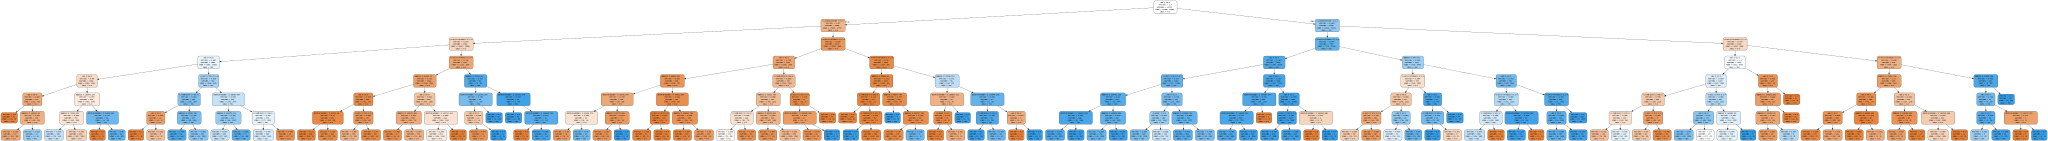

In [ ]:
import graphviz  

dot_data = tree.export_graphviz(clf, out_file =None,feature_names =x_train.columns,class_names=['No','Yes'], filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data) 
graph 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

predClassY = clf.predict(x_test)
testY = y_test['Exited'].map(exitMapping2)
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predClassY)))

Accuracy on test data is 0.76


[[1215  363]
 [ 123  299]]
Accuracy on test data is 0.76
F1 score on test data is 0.77
Precision Score on test data is 0.81
Recall score on test data is 0.76
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1578
           1       0.45      0.71      0.55       422

    accuracy                           0.76      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.81      0.76      0.77      2000



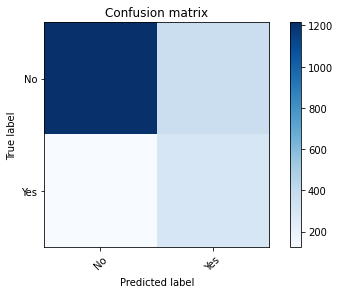

In [ ]:
confusion = confusion_matrix(testY, predClassY)
print(confusion)

plot_confusion_matrix(confusion, ['No','Yes'], title='Confusion matrix', cmap=plt.cm.Blues)

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predClassY)))
print('F1 score on test data is %.2f' % (f1_score(testY, predClassY, average='weighted')))
print('Precision Score on test data is %.2f' % (precision_score(testY, predClassY, average='weighted')))
print('Recall score on test data is %.2f' % (recall_score(testY, predClassY, average='weighted')))
print( classification_report(testY,predClassY))

# Logistic Regression (Logit)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No' 'Yes' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No' 'Yes' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No' 'Yes' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No' 'Yes' 'No' ... 'No' 'No' 'No']
['No' 'Yes' 'No' ... 'No' 'No' 'No']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No' 'Yes' 'No' ... 'No' 'No' 'No']


Text(0, 0.5, 'Accuracy')

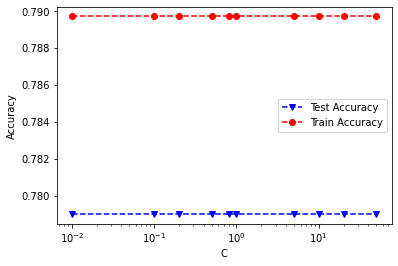

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X,Y)
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(X)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(Y,log_reg_pred_train))

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy') 

In [ ]:
# test accuract score
print(accuracy_score(y_test, log_reg_pred))
# train accuract score
print(accuracy_score(Y,log_reg_pred_train))

0.779
0.7897


# Naive Baynes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,Y)
NB_pred = clf_NB.predict(x_test)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

['No' 'Yes' 'No' ... 'No' 'No' 'No']
Accuracy on test data is 0.78


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# K-Nearest Neighbor (KNN)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['No' 'No' 'No' ... 'No' 'No' 'Yes']


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['Yes' 'No' 'No' ... 'No' 'No' 'No']


Text(0, 0.5, 'Accuracy')

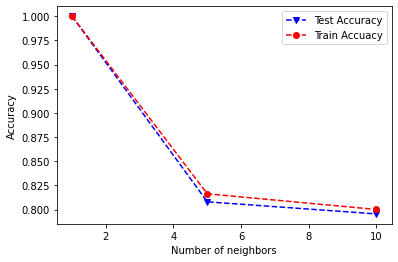

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X, Y)
    knn_pred = clf.predict(x_test)
    knn_pred_train = clf.predict(X)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(Y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

# Support Vector Machine (SVM) Classifier

### Linear Decision Boundary
Code takes too long, so we most likely have a nonlinear problem.

In [ ]:
'''from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5]

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X,Y)
    svml_pred = clf.predict(x_test)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')'''

"from sklearn.svm import SVC\n\nC = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5]\n\nSVMLtestAcc = []\nSVMLtrainAcc = []\n\n\n\nfor param in C:\n    clf = SVC(C=param,kernel='linear')\n    clf.fit(X,Y)\n    svml_pred = clf.predict(x_test)\n    svml_pred_train = clf.predict(X)\n    print(svml_pred)\n    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))\n    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))\n\nplt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')\nplt.legend(['Test Accuracy','Train Accuracy'])\nplt.xlabel('C')\nplt.xscale('log')\nplt.ylabel('Accuracy')"

### Non Linear Decision Boundary
Code takes approximately 3 minutes to execute, so RBF is most likely the appropriate kernel for this model.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No' 'No' 'No' ... 'No' 'No' 'No']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No' 'No' 'No' ... 'No' 'No' 'No']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No' 'No' 'No' ... 'No' 'No' 'No']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['No' 'No' 'No' ... 'No' 'No' 'No']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']


Text(0, 0.5, 'Accuracy')

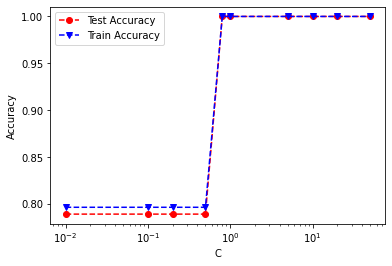

In [ ]:
from sklearn.svm import SVC
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
 

SVMLtestAcc = []
SVMLtrainAcc = []



for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,Y)
    svml_pred = clf.predict(x_test)
    svml_pred_train = clf.predict(X)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(Y,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  